In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Real_Estate_Pricing.csv')

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [6]:
from sklearn.model_selection import train_test_split
del df['Transaction date']


In [7]:
x= df.drop("House price of unit area",axis=1)
y= df["House price of unit area"]

In [8]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)


In [9]:
x_train

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
7,15.2,552.43710,5,24.997109,121.544377
194,35.9,90.45606,5,24.958754,121.564475
19,13.7,193.58450,1,24.943551,121.515410
176,15.5,167.59890,0,24.941884,121.552743
367,13.0,2103.55500,0,24.934857,121.546216
...,...,...,...,...,...
71,12.0,2408.99300,9,24.932844,121.551066
106,4.5,579.20830,7,25.014003,121.519101
270,30.4,444.13340,0,24.950815,121.544501
348,20.0,552.43710,1,24.958066,121.477361


In [10]:
y_train

7      44.116585
194    26.782369
19     16.444017
176    13.794808
367    22.491470
         ...    
71     25.696463
106    42.829193
270    11.277817
348    29.726401
102    30.850929
Name: House price of unit area, Length: 289, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
lm = LinearRegression()


In [13]:
model = lm.fit(x_train,y_train)

In [14]:
lm.coef_

array([-2.40463361e-02, -7.97358868e-03,  1.81490996e+00,  6.66819898e+01,
       -5.43564343e+01])

In [15]:
cfd = pd.DataFrame(lm.coef_ , x.columns , columns=['Coef'])
print(cfd)

                                          Coef
House age                            -0.024046
Distance to the nearest MRT station  -0.007974
Number of convenience stores          1.814910
Latitude                             66.681990
Longitude                           -54.356434


In [16]:
model.score(x_test, y_test)


0.5467318215995245

In [17]:
predications = lm.predict(x_test)

In [18]:
predications

array([37.38059587, 29.21649911, 29.74961466, 43.57544474, 22.64212901,
       33.12719379, 18.15053108, 29.11640049, 33.30506858,  7.3729599 ,
       32.70342667, 39.24006013,  9.59360482, 26.1998934 , 35.44185372,
       30.32956996, 26.28123031, 24.74582432, 32.32870992, 34.65700996,
       40.09588314, 43.70887119, 24.1986973 , 25.77809507, 17.43884459,
       34.00539088,  6.69697219, 33.34783476, 44.02158418, 31.36087838,
       35.15119698, 40.14289989, 45.87098707, 46.02822402, 30.78435485,
       28.10690251, 10.4334797 , 41.16240374, 40.50605439, 35.9382248 ,
       41.54592881, 35.08357536, 11.3748296 ,  1.6471374 , 35.82077386,
       25.07355947, 44.94293981, 37.48657366, 20.54389545, 37.89064561,
        0.25886405, 30.78280453, 27.79765097, 32.84529375, 39.24279645,
       32.1239996 , 36.87580829, 35.34993426, 43.89123416, 30.41047744,
       16.07066216, 14.06782682, 29.21363554, 36.86898122, 19.98863461,
       23.80961001, 34.49467448, 23.31345249, 36.17138846, 26.87

<Axes: xlabel='House price of unit area'>

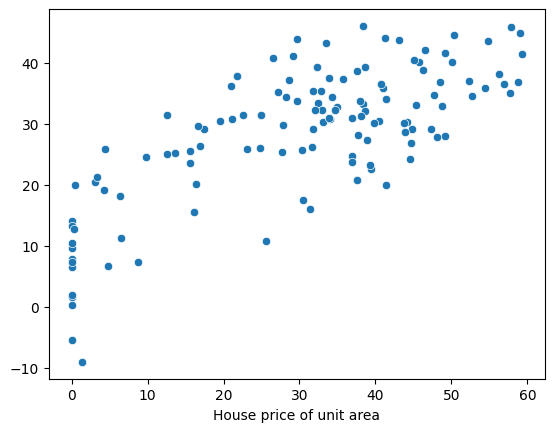

In [19]:
sns.scatterplot(x = y_test , y = predications)


In [20]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import math

In [21]:
print('MAE : ' , mean_absolute_error(y_test , predications))
print('MSE : ' , mean_squared_error(y_test , predications))
print('RMSE: ', math.sqrt(mean_squared_error(y_test , predications)))

MAE :  9.66446438279149
MSE :  130.9642851547013
RMSE:  11.443962825643103


In [22]:
residuals = y_test - predications

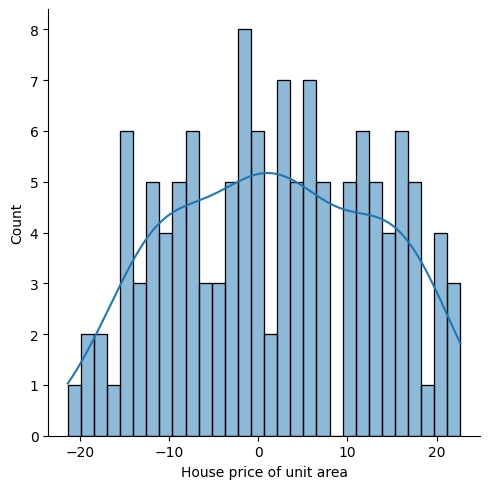

In [23]:
sns.displot(residuals , bins = 30 , kde = True)

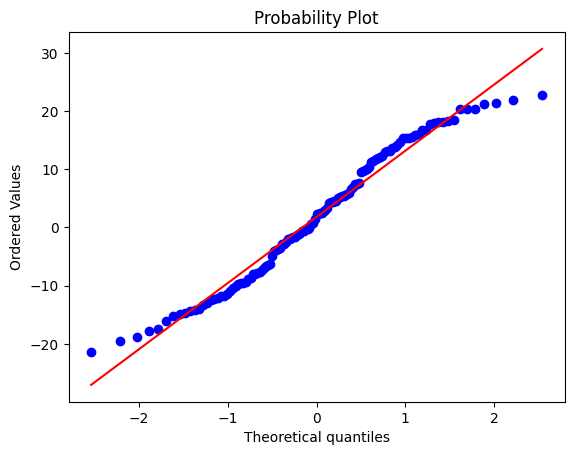

In [24]:
import pylab
import scipy.stats as stats

stats.probplot(residuals , dist = 'norm' , plot = pylab)
pylab.show()